

# **Part 1**

**An economist asserts that Truck Tonnage correlates well with the S&P 500.**

a.) Retrieve the data for each series

b.) Apply a log transform to the data (where appropriate).

c.) Shade areas that contain recessions

d.) Explain how the information may or may not be used


---




We first set up environment and load the librarires. We then retrieve data for S&P500 from yahoo.finance and define the time range  

In [55]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
from matplotlib.ticker import PercentFormatter
from pylab import rcParams
import seaborn as sns
%pylab inline
%matplotlib inline
import matplotlib
import io, os, base64, json, re 

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['spy', 'polyfit']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [56]:
#load data to spy_data
start_date = "2000-01-01"
end_date = "2019-11-16"
spy_data = pdr.DataReader('SPY', 'yahoo', start_date, end_date)
print(spy_data.head())

                 High         Low       Open     Close      Volume   Adj Close
Date                                                                          
2000-01-03  148.25000  143.875000  148.25000  145.4375   8164300.0  100.470520
2000-01-04  144.06250  139.640625  143.53125  139.7500   8089800.0   96.541473
2000-01-05  141.53125  137.250000  139.93750  140.0000  12177900.0   96.714218
2000-01-06  141.50000  137.750000  139.62500  137.7500   6227200.0   95.159882
2000-01-07  145.75000  140.062500  140.31250  145.7500   8066500.0  100.686371


**Data Cleaning for S&P 500**

In the dataset we find few object values with '.' when there was a vacation. We replace it with nan and use the bfill() to fill the missing objects with backward filling method. 

In [57]:
spy_nan=spy_data.replace('.',np.nan)
spy = spy_nan.fillna(method='bfill')
spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,148.25000,143.875000,148.25000,145.4375,8164300.0,100.470520
2000-01-04,144.06250,139.640625,143.53125,139.7500,8089800.0,96.541473
2000-01-05,141.53125,137.250000,139.93750,140.0000,12177900.0,96.714218
2000-01-06,141.50000,137.750000,139.62500,137.7500,6227200.0,95.159882
2000-01-07,145.75000,140.062500,140.31250,145.7500,8066500.0,100.686371


In [58]:
#check if any nan values
spy.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [59]:
#Rename column
spy.rename(columns = {'Adj Close':'Adj_Close'}, inplace = True)
spy.head()

,High,Low,Open,Close,Volume,Adj_Close
Date,,,,,,
2000-01-03,148.25000,143.875000,148.25000,145.4375,8164300.0,100.470520
2000-01-04,144.06250,139.640625,143.53125,139.7500,8089800.0,96.541473
2000-01-05,141.53125,137.250000,139.93750,140.0000,12177900.0,96.714218
2000-01-06,141.50000,137.750000,139.62500,137.7500,6227200.0,95.159882
2000-01-07,145.75000,140.062500,140.31250,145.7500,8066500.0,100.686371


We retrieve data for Truck Tonnage from FRED and define the time range. 

In [60]:
start_date = "1990-01-01"
end_date = "2019-11-16"
truck = pdr.DataReader('TRUCKD11', 'fred', start_date, end_date)
print(truck.head(13))

            TRUCKD11
DATE                
2000-01-01      80.2
2000-02-01      79.7
2000-03-01      74.1
2000-04-01      72.8
2000-05-01      73.0
2000-06-01      74.9
2000-07-01      72.6
2000-08-01      74.7
2000-09-01      74.1
2000-10-01      74.2
2000-11-01      74.8
2000-12-01      74.2
2001-01-01      74.8


# **Semi Log Transformation for Truck Tonnage**
After that we perform '**semi-log transformation**' on the Truck Tonnage data. Here, the data on y axis (TRUCKD11) is on logarithmic scale and the data on the x axis is on normal scale. We perform this when the values of data vary between very small values and very large values .

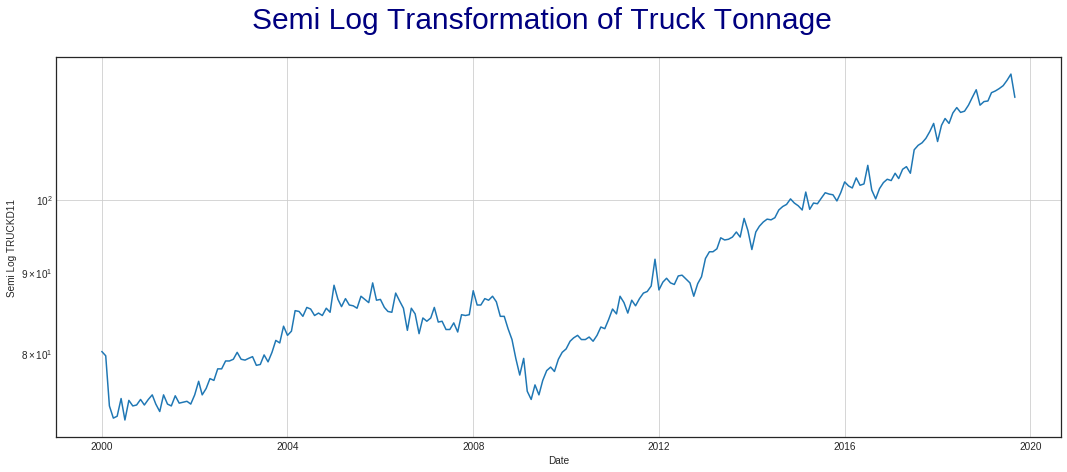

In [61]:
from pandas.plotting import register_matplotlib_converters
semi=plt.figure(figsize=(18,7))
plt.semilogy(truck['TRUCKD11'])
plt.xlabel("Date")
plt.ylabel("Semi Log TRUCKD11")
plt.suptitle('Semi Log Transformation of Truck Tonnage', fontsize=30, c='navy')
plt.grid()
plt.show()

Text(0.5, 1.0, 'S&P 500 and Truck Tonnage Index with Recession Phase')

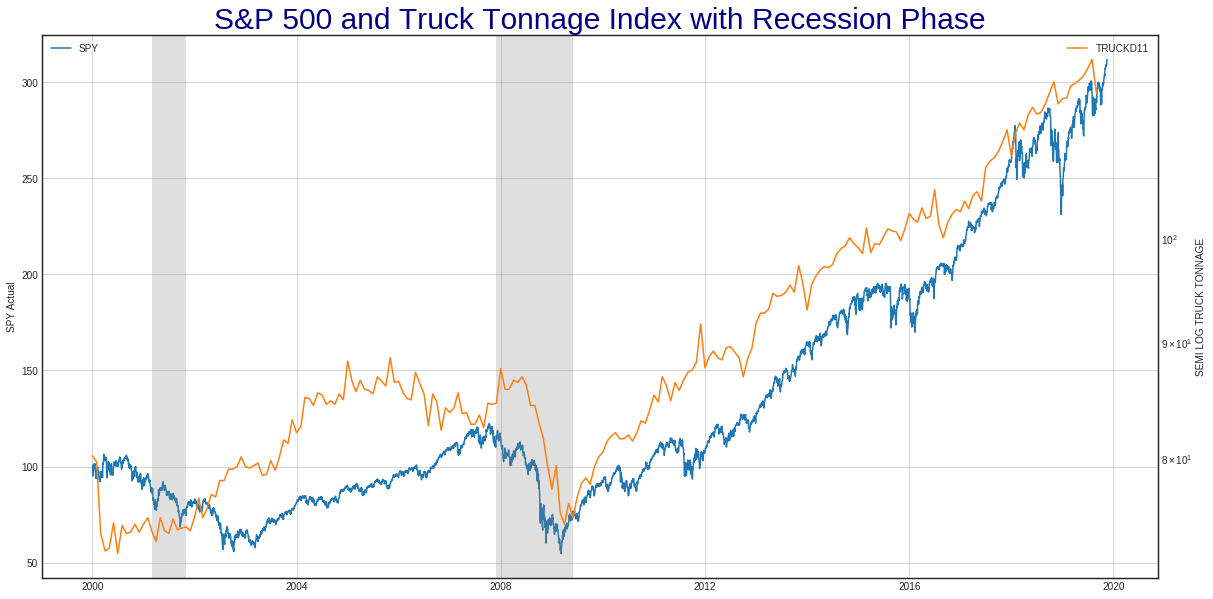

In [62]:
#Plot SPY and Semi Log Transformed TRUCKD11 on same graph 
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(spy['Adj_Close'], '-r', label='SPY',color='tab:blue')
plt.legend()
plt.grid()
ax.tick_params('x')
ax.set_ylabel("SPY Actual")
plt.legend(loc = 'upper left')

# Get second axis
ax2 = ax.twinx()
semilogy(truck['TRUCKD11'], 'c', label='TRUCKD11',color='tab:orange')
plt.legend(loc = 'upper right')
ax.tick_params('y')
ax2.set_ylabel("SEMI LOG TRUCK TONNAGE")
#Recission shading
ax2.axvspan('2001-03-01','2001-11-01', alpha = 0.25, facecolor = "grey")
ax2.axvspan('2007-12-01','2009-06-01', alpha = 0.25, facecolor = "grey")
plt.title('S&P 500 and Truck Tonnage Index with Recession Phase',fontsize=30,c='navy')

**Correlation of Truck Tonnage Index (TRUCKD11) and S&P 500 (SPY)**

For finding a correlation between the two indices we need to have same dimension of both variables. As we have data for Truck Tonnage Index (TRUCKD11) from January 2000- September 2019 in a monthly interval, we load  S&P 500 (SPY) data in the same range.

In [63]:
#Load SPY from 2000 Jan till 2019 Sep in monthly interval
spy_data = pdr.get_data_yahoo('SPY','01/01/2000','09/30/2019',interval='m')
#Rename column
spy_data.rename(columns = {'Adj Close':'Adj_Close'}, inplace = True)
print(spy_data.head())

                  High        Low      Open      Close       Volume   Adj_Close
Date                                                                           
2000-01-01  148.250000  135.00000  148.2500  139.56250  156770800.0   96.411942
2000-02-01  144.562500  132.71875  139.7500  137.43750  186938300.0   94.943932
2000-03-01  155.750000  135.03125  137.6250  150.37500  247594900.0  103.881409
2000-04-01  153.109375  133.50000  150.1250  145.09375  229246200.0  100.487762
2000-05-01  148.484375  136.50000  146.5625  142.81250  161024000.0   98.907852


In [64]:
#Correlation between SPY and TRUCK
print(np.corrcoef(spy_data['Adj_Close'],truck['TRUCKD11']))

[[1.         0.95833173]
 [0.95833173 1.        ]]


No handles with labels found to put in legend.


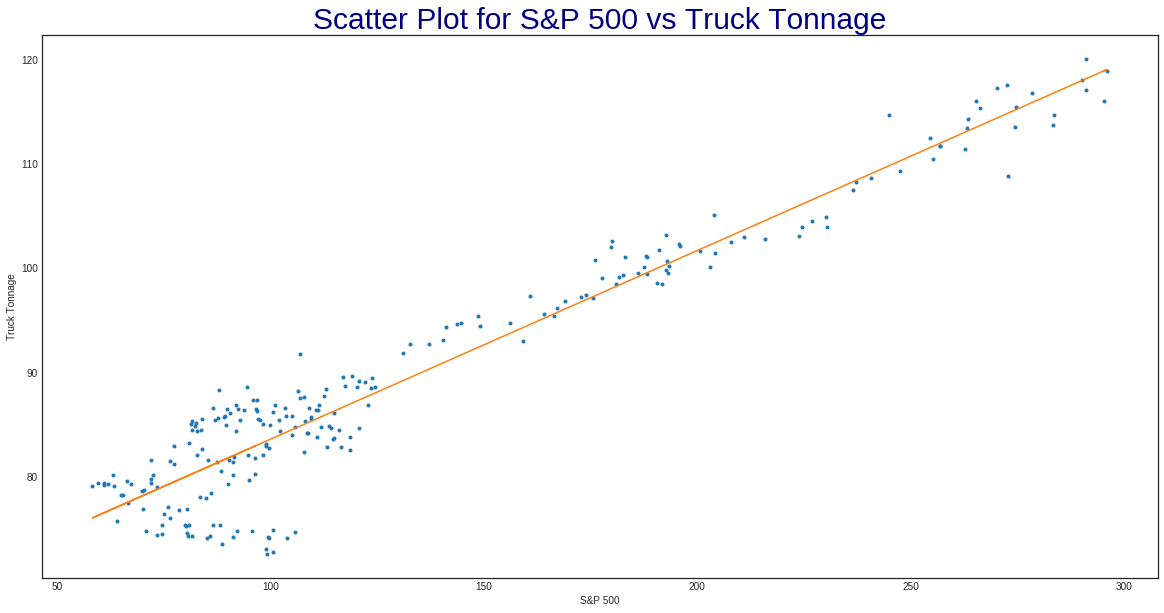

In [65]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

b, m = polyfit(spy_data['Adj_Close'], truck['TRUCKD11'], 1)
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(spy_data['Adj_Close'], truck['TRUCKD11'], '.')
plt.plot(spy_data['Adj_Close'], b + m * spy_data['Adj_Close'], '-')
plt.xlabel('S&P 500')
plt.ylabel('Truck Tonnage')
plt.title('Scatter Plot for S&P 500 vs Truck Tonnage',fontsize=30,c='navy')
plt.legend()
plt.show()



> # **CRITICAL ANALYSIS**

---

**S&P 500 (SPY)** is a US stock market index that measures the stock performance of 500 large companies listed on the US stock exchanges. It reflects the health of the US stock market and is one of the most commonly followed equity indices in US.

**Truck Tonnage Index (TRUCKD11)** measures the gross tonnage of freight which is transported by motor carriers in the US. The index serves as an indicator of shipping activity and consumption of goods in the US. Analysts also use the truck tonnage index to determine the state of the US economy as over 70% of all freight tonnage is via truck.

The dataframe for analysis of S&P 500 (SPY) and Truck Tonnage Index (TRUCKD11) is from January 2000 till November 2019. 

 **Correlation**
 
Correlation Coefficient is used to measure the strength of a linear association between two variables. The correlation coefficient between SPY and TRUCKD11 stands at 0.958, which means that we can imply that 96% of the time the SPY and TRUCKD11 will move in the same direction. I have also performed Scatter Plot for SPY and TRUCKD11. From the Scatter Plot we see that there is a linear relationship present between SPY and TRUCKD11, as SPY increases so does the TRUCKD11. 

**Recession** is a period in the business cycle of the economy when there is a drop in the economic activity, primarily displayed by the drop in real GDP, income, employment, manufacturing, and retail sales. During this period, the US economy had two major troughs of recession, ranging from 2001-03-01 to 2001-11-01 and 2007-12-01 to 2009-06-01.

 We can analyze that Truck Tonnage Index (TRUCKD11) has a positive correlation with S&P 500 (SPY). In the period pre-2001 recession, the TRUCKD11 did not see much of an negative impact on its index compared to to SPY. Also, in contrast to SPY, TRUCKD11 did not witness a downfall in its index post-2001 recession and had an upward trend. However, since 2007 and also in the time the '*Great 2008 Recession*' which officially lasted from December 2007 to June 2009 we can see that TRUCKD11 is a mirror image of SPY.

 From 2009 and till date we can conclude that TRUCKD11 has had a positive correlation with SPY.
 

This information will be very useful for analysts and 'economy watchers' to consider an upcoming recession. In the 2001 and 2008 recessions, trucking tonnage has probably served more to confirm rather than predict recessions and recoveries. Truck Tonnage has displayed its performance similar to the recession and has correctly had a recovery after the Great Recession, as confirmed by the economy in the same time. 

Trucking Tonnage Index serves as a barometer of the US economy, representing nearly 69% of tonnage carried by all modes of domestic freight transportation, including manufactured and retail goods. Trucks hauled 10.2 billion tons of freight in 2008. Motor carriers collected $660.3 billion, or 83% of total revenue earned by all transport modes.


https://www.bulktransporter.com/tank-fleets/ata-truck-tonnage-indexslips-05-february

---



# **Part 2**

**An economist asserts that stock market direction is largely based on whether the S&P 500 Index is above/below the 200 Day Simple Moving Average (SMA).**

a.) Retrieve the data for the S&P 500

b.) Create simple moving average columns for not only the 200 day SMA, but also for other popular SMAs (e.g., 20, 50, and 100)

c.) Plot the data and identify any relationships

d.) Shade areas that contain recessions

e.) Explain how the information may or may not be used



---



In [66]:
#Retrieve data for S&P 500 from 1993 to spy_beg
start_date = "1993-01-01"
end_date = "2019-11-16"
spy_beg= pdr.DataReader('SPY', 'yahoo', start_date, end_date)
#Rename column
spy_beg.rename(columns = {'Adj Close':'Adj_Close'}, inplace = True)
print(spy_beg.head())

                High       Low      Open     Close     Volume  Adj_Close
Date                                                                    
1993-01-29  43.96875  43.75000  43.96875  43.93750  1003200.0  26.583992
1993-02-01  44.25000  43.96875  43.96875  44.25000   480500.0  26.773048
1993-02-02  44.37500  44.12500  44.21875  44.34375   201300.0  26.829773
1993-02-03  44.84375  44.37500  44.40625  44.81250   529400.0  27.113388
1993-02-04  45.09375  44.46875  44.96875  45.00000   531500.0  27.226835


**Data Cleaning for S&P 500**

In the dataset we find few object values with '.' when there was a vacation. We replace it with nan and use the bfill() to fill the missing objects with backward filling method. 

In [67]:
spy_beg.isnull().sum()
spy_beg_nan=spy_beg.replace('.',np.nan)
#fill the missing values with backward filling
spySMA = spy_beg_nan.fillna(method='bfill')
#spySMA.dropna(inplace=True)
spySMA.head()

,High,Low,Open,Close,Volume,Adj_Close
Date,,,,,,
1993-01-29,43.96875,43.75000,43.96875,43.93750,1003200.0,26.583992
1993-02-01,44.25000,43.96875,43.96875,44.25000,480500.0,26.773048
1993-02-02,44.37500,44.12500,44.21875,44.34375,201300.0,26.829773
1993-02-03,44.84375,44.37500,44.40625,44.81250,529400.0,27.113388
1993-02-04,45.09375,44.46875,44.96875,45.00000,531500.0,27.226835


# **Simple Moving Average**

Simple Moving Average (SMA) is an arithmetic moving average calculated by adding recent closing prices of a security and then dividing that by the number of time periods in the calculation average. We do this by pandas rolling method to compute moving averages

In [68]:
spySMA["10DaySMA"]=spySMA["Adj_Close"].rolling(window=10).mean()
spySMA["20DaySMA"]=spySMA["Adj_Close"].rolling(window=20).mean()
spySMA["50DaySMA"]=spySMA["Adj_Close"].rolling(window=50).mean()
spySMA["100DaySMA"]=spySMA["Adj_Close"].rolling(window=100).mean()
spySMA["200DaySMA"]=spySMA["Adj_Close"].rolling(window=200).mean()
print(spySMA.head())

                High       Low      Open  ...  50DaySMA  100DaySMA  200DaySMA
Date                                      ...                                
1993-01-29  43.96875  43.75000  43.96875  ...       NaN        NaN        NaN
1993-02-01  44.25000  43.96875  43.96875  ...       NaN        NaN        NaN
1993-02-02  44.37500  44.12500  44.21875  ...       NaN        NaN        NaN
1993-02-03  44.84375  44.37500  44.40625  ...       NaN        NaN        NaN
1993-02-04  45.09375  44.46875  44.96875  ...       NaN        NaN        NaN

[5 rows x 11 columns]


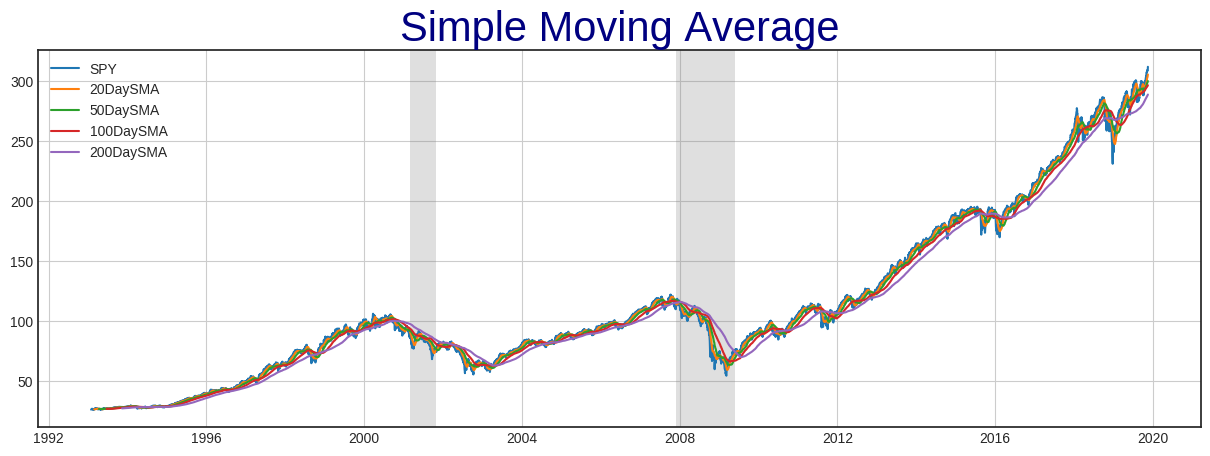

In [69]:
plt.figure(figsize=(15,5),dpi=100)
plt.grid(True)
plt.plot(spySMA['Adj_Close'],label='SPY')
plt.plot(spySMA['20DaySMA'], label='20DaySMA')
plt.plot(spySMA['50DaySMA'], label='50DaySMA')
plt.plot(spySMA['100DaySMA'], label='100DaySMA')
plt.plot(spySMA['200DaySMA'], label='200DaySMA')
plt.title('Simple Moving Average',fontsize=30,c='navy')
plt.legend(loc=2)
axvspan('2001-03-01','2001-11-01', alpha = 0.25, facecolor = "gray")
axvspan('2007-12-01','2009-06-01', alpha = 0.25, facecolor = "gray")
plt.style.use('seaborn-white')

# **CRITICAL ANALYSIS**

For analysis, SMAs works as a technical indicator to determine the trend of the price of the security. It is used as an analytical tool to identify if there will be an  increase or reverse a bull or bear trend. If the SMA is moving up, the trend is up. If the SMA is moving down, the trend is down.

Shorter period SMAs like, 20 Day SMA or 50 Day SMA can be used to determine the shorter term trends. Whereas 200 days SMA has a smoother S&P 500 data which is a good indicator for the long term trend. 

**Investor trading decisions**

Price crossing SMA is often used to trigger trading signals. 

When prices cross above the SMA-go long or cover short; 

cross below the SMA-go short or exit long.

If a shorter-term simple moving average is above a longer-term average, an uptrend is expected. On the other hand, a long-term average above a shorter-term average signals a downward movement in the trend.

https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/sma

# **Part 3 -**


**Come up with your own assertion and test it (use the data above or other interesting things, such as GDP, the 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity, the Cyclically Adjusted PE)**

a.) Document your hypothesis or idea

b.) Retrieve the data

c.) Highlight interesting areas

d.) Explain how the information may or may not be used

**The 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity (T10Y2Y)** or the yield curve is the difference between the yield on 10-year and 2-year US government bonds.



In [70]:
import pandas_datareader as pdr
start_date = "1996-01-01"
end_date = "2019-11-16"
T10Y2Y_data = pdr.DataReader('T10Y2Y', 'fred', start_date, end_date)
print(T10Y2Y_data.head())

            T10Y2Y
DATE              
1996-01-01     NaN
1996-01-02    0.42
1996-01-03    0.41
1996-01-04    0.48
1996-01-05    0.49


In [71]:
T10Y2Y_data.isnull().sum()

T10Y2Y    255
dtype: int64

In [72]:
T10Y2Y_nan=T10Y2Y_data.replace('.',np.nan)
T10Y2Y_nan.head()
#data = sp500_nan.ffill().bfill()
T10Y2Y = T10Y2Y_nan.fillna(method='bfill')
T10Y2Y.head()

,T10Y2Y
DATE,
1996-01-01,0.42
1996-01-02,0.42
1996-01-03,0.41
1996-01-04,0.48
1996-01-05,0.49


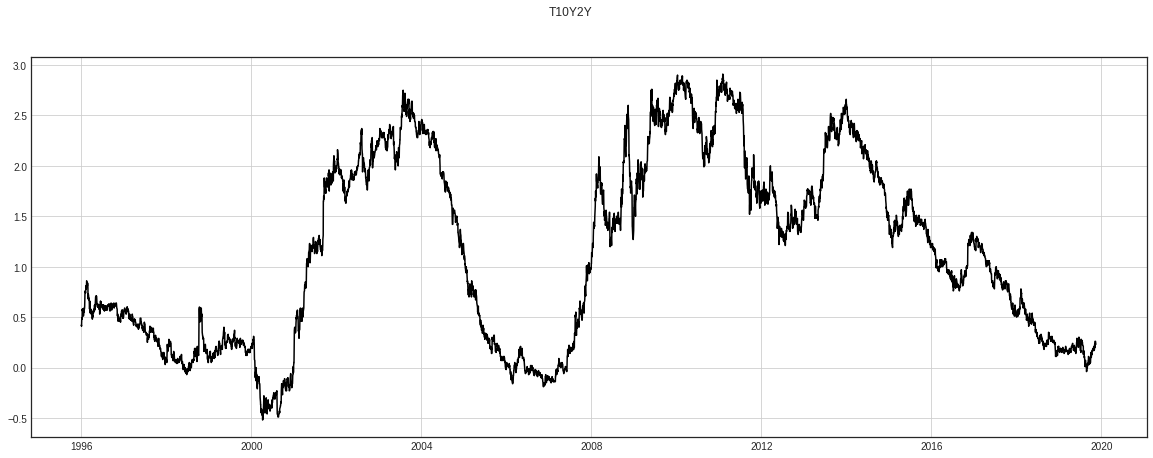

In [73]:
fig=plt.figure(figsize=(20,7))
plt.plot(T10Y2Y['T10Y2Y'],c='black')
plt.suptitle('T10Y2Y')
plt.grid()
plt.show()

**Cyclically Adjusted Price-to-Earnings ratio (CAPE) or Shiller P/E** is a valuation measure usually applied to the US S&P 500 equity market. It is defined as price divided by the average of ten years of earnings (moving average), adjusted for inflation. It is used to gauge whether a stock is undervalued or overvalued by comparing its current market price to its inflation adjusted historical earnings record.

It is imported using quandl.

In [0]:
!pip install --q quandl

In [75]:
import quandl
quandl.ApiConfig.api_key="wooDcJ83PJvMCmastzkf"
#&api_key=<wooDcJ83PJvMCmastzkf> 
start = "1996-01-01"
end = "2019-11-16"
CAPE=quandl.get("MULTPL/Shiller_PE_Ratio_Month",start_date=start,end_date=end,api_key="wooDcJ83PJvMCmastzkf")
CAPE.head()

,Value
Date,
1996-01-01,24.76
1996-02-01,25.97
1996-03-01,25.63
1996-04-01,25.42
1996-05-01,25.81


In [76]:
#load data to spy_data
start_date = "1996-01-01"
end_date = "2019-11-16"
spy_q = pdr.DataReader('SPY', 'yahoo', start_date, end_date)
spy_q['logspyq'] = np.log(spy_q['Adj Close']) #Apply log transformation for the truck data
print(spy_q.head())

                 High        Low       Open  ...     Volume  Adj Close   logspyq
Date                                         ...                                
1996-01-02  62.140625  61.343750  61.406250  ...   514400.0  40.481094  3.700835
1996-01-03  62.500000  62.000000  62.343750  ...   610300.0  40.593056  3.703597
1996-01-04  62.625000  61.218750  62.390625  ...  1129700.0  40.206276  3.694023
1996-01-05  61.750000  61.171875  61.312500  ...   302400.0  40.124836  3.691995
1996-01-08  61.906250  61.734375  61.812500  ...   179900.0  40.277523  3.695794

[5 rows x 7 columns]


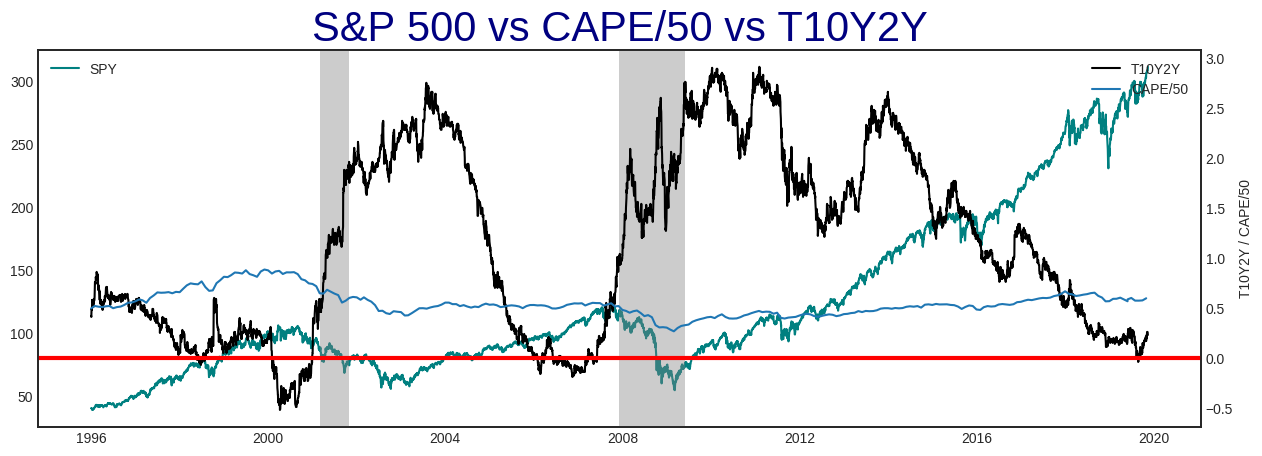

In [77]:
x1 = spy_q.index
x2 = T10Y2Y.index
x3 = CAPE.index
y1 = spy_q['Adj Close']
y2 = T10Y2Y['T10Y2Y']
y3 = CAPE['Value']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(15,5), dpi= 100,)
ax1.plot(x1, y1,label="SPY", c='teal')
plt.legend(loc = 'upper left')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x2, y2,label="T10Y2Y", c='black')
ax2.plot(x3, y3/50,label="CAPE/50", color='tab:blue')
ax.tick_params('y')
ax2.set_ylabel("T10Y2Y / CAPE/50")
plt.legend()
plt.axhline(y=0, color='r', linestyle='-',linewidth=3)
plt.title('S&P 500 vs CAPE/50 vs T10Y2Y',fontsize=30,c='navy')
ax2.axvspan('2001-03-01','2001-11-01', alpha = 0.4, facecolor = "gray")
ax2.axvspan('2007-12-01','2009-06-01', alpha = 0.4, facecolor = "gray")

# **CRITICAL ANALYSIS**

We see that there is a relationship between SPY and CAPE. CAPE helps us identify if stocks are over valued or undervalued.


### "Are we headed for the next Recession?"

---



I have formulated my hypothesis for analysis as **whether the US economy is leading towards a recession**?

For this I have identified variables which I feel are good indicators for this study, they are:

Unemployment Rate

T10Y2Y- yield curve

SPY

GDP change

Recession Talks


**Unemployment Rate (UNRATE)**

In the last two recessions we witnessed that during recession there was a peak in the rate of unemployed people, which is a factor in the decline of an economy.

In [78]:
import pandas_datareader as pdr
start_date = "1996-01-01"
end_date = "2019-11-16"
unemployment = pdr.DataReader('UNRATE', 'fred', start_date, end_date)
print(unemployment.head())

            UNRATE
DATE              
1996-01-01     5.6
1996-02-01     5.5
1996-03-01     5.5
1996-04-01     5.6
1996-05-01     5.6


In [79]:
import quandl
quandl.ApiConfig.api_key="wooDcJ83PJvMCmastzkf"
#&api_key=<wooDcJ83PJvMCmastzkf> 
start = "1996-01-01"
end = "2019-11-16"
GDP_data=quandl.get("FRED/GDP",start_date=start,end_date=end,api_key="wooDcJ83PJvMCmastzkf")
GDP_data.head()

,Value
Date,
1996-01-01,7868.468
1996-04-01,8032.840
1996-07-01,8131.408
1996-10-01,8259.771
1997-01-01,8362.655


**Gross Domestic Product GDP** reflects the economic health of an economy as it displays the total goods and services produced in an economy in a financial year.


In [80]:
import pandas_datareader as pdr
start_date = "1996-01-01"
end_date = "2019-11-16"
gdp_data = pdr.DataReader('GDPC1', 'fred', start_date, end_date)
print(gdp_data.head())
gdp_data['gdp_pct_change'] = gdp_data['GDPC1'].pct_change()
gdp_data.head()

                GDPC1
DATE                 
1996-01-01  10817.896
1996-04-01  10998.322
1996-07-01  11096.976
1996-10-01  11212.205
1997-01-01  11284.587


,GDPC1,gdp_pct_change
DATE,,
1996-01-01,10817.896,NaN
1996-04-01,10998.322,0.016678
1996-07-01,11096.976,0.008970
1996-10-01,11212.205,0.010384
1997-01-01,11284.587,0.006456


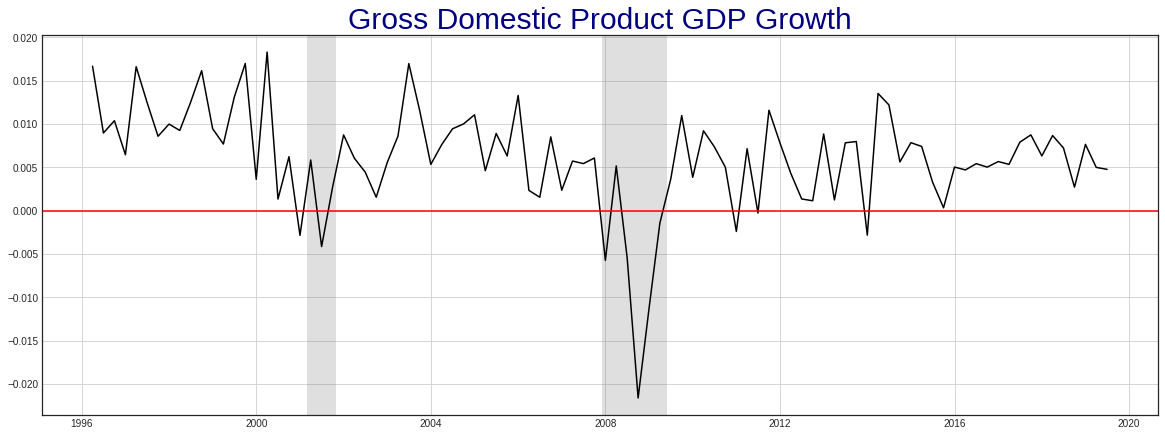

In [81]:
fig=plt.figure(figsize=(20,7))
plt.plot(gdp_data['gdp_pct_change'],c='black')
plt.axhline(y=0, color='r', linestyle='-')
axvspan('2001-03-01','2001-11-01', alpha = 0.25, facecolor = "gray")
axvspan('2007-12-01','2009-06-01', alpha = 0.25, facecolor = "gray")
plt.title('Gross Domestic Product GDP Growth',fontsize=30,c='navy')
plt.grid()
plt.show()

In [82]:
#load data to spy_data
start_date = "1996-01-01"
end_date = "2019-11-16"
spy_q = pdr.DataReader('SPY', 'yahoo', start_date, end_date)
spy_q['logspyq'] = np.log(spy_q['Adj Close']) #Apply log transformation for the truck data
print(spy_q.head())

                 High        Low       Open  ...     Volume  Adj Close   logspyq
Date                                         ...                                
1996-01-02  62.140625  61.343750  61.406250  ...   514400.0  40.481094  3.700835
1996-01-03  62.500000  62.000000  62.343750  ...   610300.0  40.593056  3.703597
1996-01-04  62.625000  61.218750  62.390625  ...  1129700.0  40.206276  3.694023
1996-01-05  61.750000  61.171875  61.312500  ...   302400.0  40.124836  3.691995
1996-01-08  61.906250  61.734375  61.812500  ...   179900.0  40.277523  3.695794

[5 rows x 7 columns]


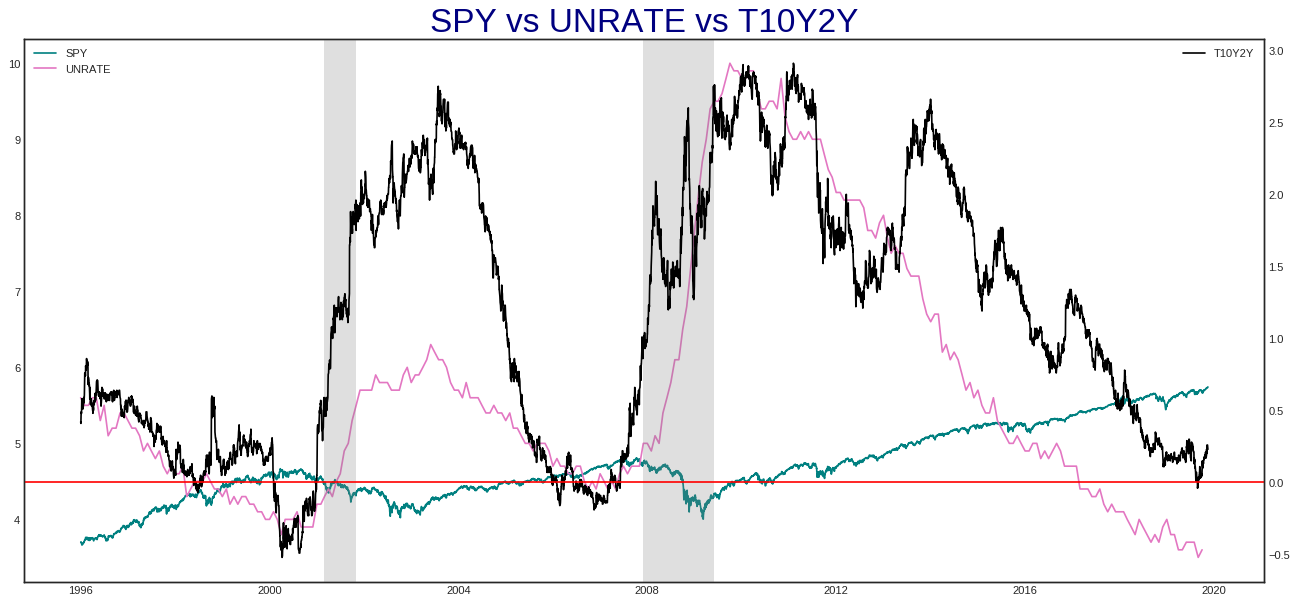

In [83]:
x1 = spy_q.index
x2 = T10Y2Y.index
x3 = unemployment.index
y1 = spy_q['logspyq']
y2 = T10Y2Y['T10Y2Y']
y3=unemployment['UNRATE']
# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(20,9), dpi= 80,)
ax1.plot(x1, y1,label="SPY", c='teal')
ax1.plot(x3, y3,label="UNRATE", color='tab:pink')
plt.legend(loc = 'upper left')
# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x2, y2,label="T10Y2Y", c='black')
plt.legend()
plt.axhline(y=0, color='r', linestyle='-')
plt.title('SPY vs UNRATE vs T10Y2Y',fontsize=30,c='navy')
ax2.axvspan('2001-03-01','2001-11-01', alpha = 0.25, facecolor = "gray")
ax2.axvspan('2007-12-01','2009-06-01', alpha = 0.25, facecolor = "gray")

After analysing the unemployment rate, S&P 500 prices, GDP growth and Treasury we can establish that though the Treasury displays a picture of recession, we can confirm from the other factors that the US economy is healthy now and heading towards recession.

# **Recession Talks**

Through Google Trends we can however see an increase of panick in the US consumers and investors as there have been a lot of talks going on about recession in this year.

In [84]:
pip install pytrends

  Created wheel for pytrends: filename=pytrends-4.7.2-cp36-none-any.whl size=14260 sha256=1fa6f725db3558c459fe94d5ecd9ae0ef86c266630e21fa7a9005ec5a7c43311
  Stored in directory: /root/.cache/pip/wheels/64/ae/af/51d48fbbca0563036c6f80999b7ce3f097fa591fd165047baf
Successfully built pytrends


In [0]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)

In [0]:
kw_list = ["Recession"]
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')

In [87]:
pyt=pytrends.interest_over_time()
pyt

,Recession,isPartial
date,,
2004-01-01,6,False
2004-02-01,9,False
2004-03-01,9,False
2004-04-01,9,False
2004-05-01,7,False
...,...,...
2019-07-01,17,False
2019-08-01,61,False
2019-09-01,33,False


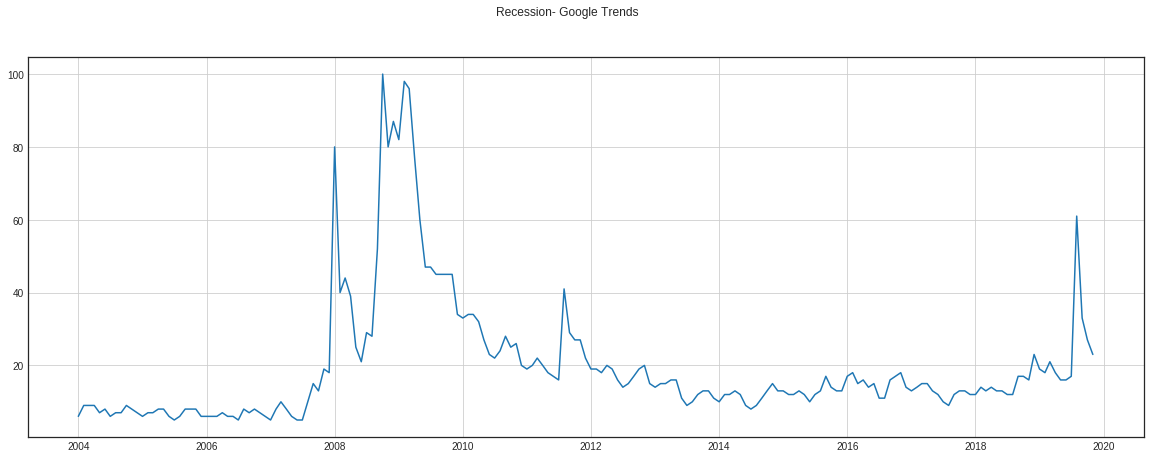

In [88]:
fig1=plt.figure(figsize=(20,7))
plt.plot(pyt['Recession'])
plt.suptitle('Recession- Google Trends')
plt.grid()
plt.show()